In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import yfinance as yf

data = yf.download(tickers = "GC=F", start="2017-12-01", end="2023-06-16", interval='1d')

[*********************100%***********************]  1 of 1 completed


In [3]:
data = data.reset_index('Date', inplace=False)

In [4]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

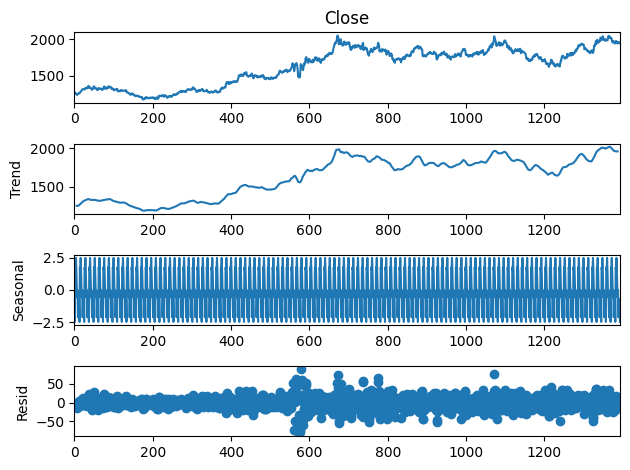

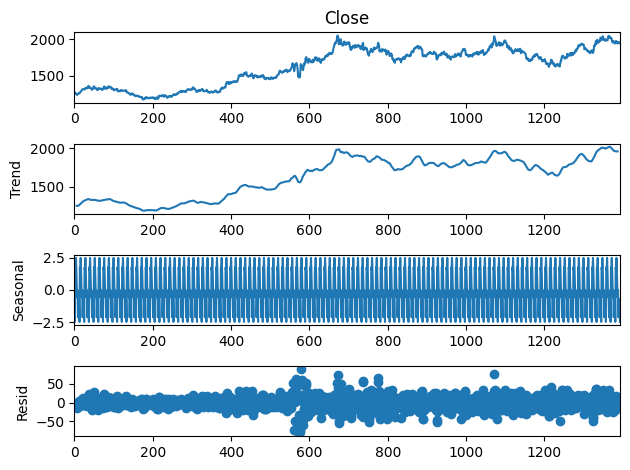

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Phân tích thành phần mùa vụ
result = seasonal_decompose(data['Close'], model='additive', period=12)

# Trực quan hóa các thành phần
result.plot()

### Simple Exponential Smoothing

In [5]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

<Axes: >

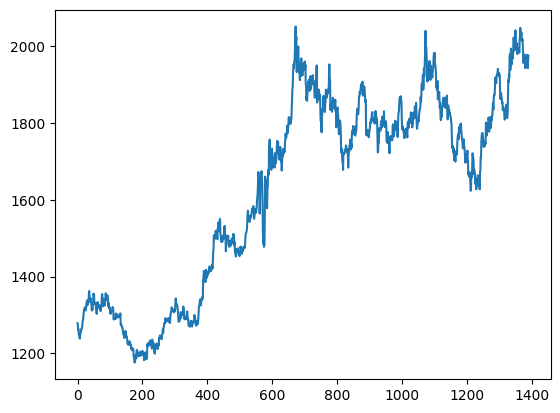

In [9]:
data['Close'].plot()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [34]:
# Build model 
model = ExponentialSmoothing(train_data['Close'], trend='add', seasonal=None)

In [35]:
model_fit = model.fit()

In [38]:
y_pred = model_fit.forecast(steps=len(test_data))
y_pred_val = model_fit.forecast(steps=len(val_data))

In [39]:
y_next_30_days = model_fit.forecast(steps=30)

In [44]:
y_next_30_days

968    1757.265525
969    1756.576357
970    1755.887188
971    1755.198020
972    1754.508851
973    1753.819683
974    1753.130514
975    1752.441346
976    1751.752178
977    1751.063009
978    1750.373841
979    1749.684672
980    1748.995504
981    1748.306335
982    1747.617167
983    1746.927999
984    1746.238830
985    1745.549662
986    1744.860493
987    1744.171325
988    1743.482156
989    1742.792988
990    1742.103820
991    1741.414651
992    1740.725483
993    1740.036314
994    1739.347146
995    1738.657977
996    1737.968809
997    1737.279640
dtype: float64

In [41]:
import matplotlib.pyplot as plt

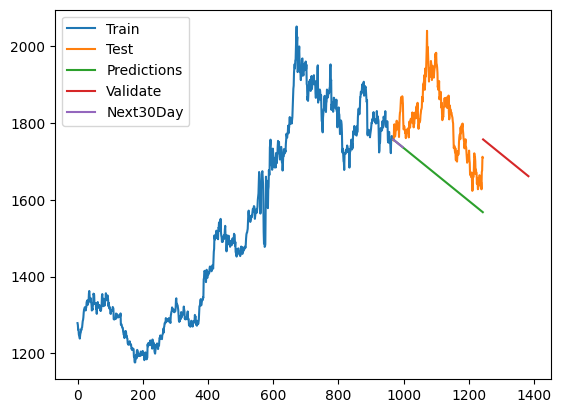

In [43]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()